In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')

In [10]:
print(xy[:10])

[[0.97333581 0.97543152 1.         0.11112306 0.98831302]
 [0.95690035 0.95988111 0.9803545  0.14250246 0.97785024]
 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.93644323 0.93932734 0.96226395 0.10667742 0.95211558]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.91021623 0.91296982 0.92617114 0.10284127 0.92046468]
 [0.90144472 0.9090966  0.92203374 0.11000269 0.91635521]]


In [4]:
# very important. It does not work without it.
scaler = MinMaxScaler(feature_range=(0, 1))
xy = scaler.fit_transform(xy)

In [5]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [6]:
# before deletion
print(x_data[0], y_data[0])
print(x_data[1], y_data[1])

[0.97333581 0.97543152 1.         0.11112306] [0.98831302]
[0.95690035 0.95988111 0.9803545  0.14250246] [0.97785024]


In [7]:
# predict tomorrow
x_data = np.delete(x_data, -1, 0)
y_data = np.delete(y_data, 0)

In [8]:
print("== Predict tomorrow")
print(x_data[0], "->", y_data[0])

== Predict tomorrow
[0.97333581 0.97543152 1.         0.11112306] -> 0.9778502390712853


In [11]:
model = Sequential()
model.add(Dense(input_dim=4, units=1))

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])
model.fit(x_data, y_data, epochs=100)

W0314 18:35:31.323940  6352 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0314 18:35:31.341497  6352 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 18:35:31.343490  6352 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0314 18:35:31.359448  6352 deprecation_wrapper.py:119] From C:\Users\Admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0314 18:35:31.466995  6352 deprecation_wrapper.py:119] From C:\Users\Admin\Anac

Epoch 1/100
731/731 [==============================] - 0s 193us/step - loss: 0.5409 - mean_squared_error: 0.5409
Epoch 2/100
731/731 [==============================] - 0s 31us/step - loss: 0.1598 - mean_squared_error: 0.1598
Epoch 3/100
731/731 [==============================] - 0s 28us/step - loss: 0.0782 - mean_squared_error: 0.0782
Epoch 4/100
731/731 [==============================] - 0s 23us/step - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 5/100
731/731 [==============================] - 0s 31us/step - loss: 0.0462 - mean_squared_error: 0.0462
Epoch 6/100
731/731 [==============================] - 0s 28us/step - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 7/100
731/731 [==============================] - 0s 26us/step - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 8/100
731/731 [==============================] - 0s 34us/step - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 9/100
731/731 [==============================] - 0s 29us/step - loss: 0.0260 - mean_squared_error

731/731 [==============================] - 0s 27us/step - loss: 4.3404e-04 - mean_squared_error: 4.3404e-04
Epoch 71/100
731/731 [==============================] - 0s 25us/step - loss: 4.3336e-04 - mean_squared_error: 4.3336e-04
Epoch 72/100
731/731 [==============================] - 0s 27us/step - loss: 4.3272e-04 - mean_squared_error: 4.3272e-04
Epoch 73/100
731/731 [==============================] - 0s 22us/step - loss: 4.3179e-04 - mean_squared_error: 4.3179e-04
Epoch 74/100
731/731 [==============================] - 0s 27us/step - loss: 4.3148e-04 - mean_squared_error: 4.3148e-04
Epoch 75/100
731/731 [==============================] - 0s 27us/step - loss: 4.3067e-04 - mean_squared_error: 4.3067e-04
Epoch 76/100
731/731 [==============================] - 0s 27us/step - loss: 4.3033e-04 - mean_squared_error: 4.3033e-04
Epoch 77/100
731/731 [==============================] - 0s 24us/step - loss: 4.2952e-04 - mean_squared_error: 4.2952e-04
Epoch 78/100
731/731 [=======================

In [12]:
test = x_data[10].reshape(-1, 4)
print("y=", y_data[10], "prediction=", model.predict(test))

test = x_data[30].reshape(-1, 4)
print("y=", y_data[30], "prediction=", model.predict(test))

y= 0.9003840704898083 prediction= [[0.8899299]]
y= 0.8786132057338312 prediction= [[0.89557654]]


In [13]:
# ---------------------------
# Test
# split to train and testing

In [14]:
train_size = int(len(x_data) * 0.7)
test_size = len(x_data) - train_size
x_train, x_test = x_data[0:train_size], x_data[train_size:len(x_data)]
y_train, y_test = y_data[0:train_size], y_data[train_size:len(y_data)]

In [15]:
model = Sequential()
model.add(Dense(input_dim=4, units=1))
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [16]:
# Train a model
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
511/511 [==============================] - 0s 194us/step - loss: 0.2475 - mean_squared_error: 0.2475
Epoch 2/200
511/511 [==============================] - 0s 36us/step - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 3/200
511/511 [==============================] - 0s 31us/step - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 4/200
511/511 [==============================] - 0s 32us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5/200
511/511 [==============================] - 0s 31us/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 6/200
511/511 [==============================] - 0s 35us/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 7/200
511/511 [==============================] - 0s 43us/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 8/200
511/511 [==============================] - 0s 45us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 9/200
511/511 [==============================] - 0s 37us/step - loss: 0.0062 - mean_squared_error

511/511 [==============================] - 0s 27us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 74/200
511/511 [==============================] - 0s 29us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 75/200
511/511 [==============================] - 0s 26us/step - loss: 0.0011 - mean_squared_error: 0.0011   
Epoch 76/200
511/511 [==============================] - 0s 29us/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 77/200
511/511 [==============================] - 0s 25us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 78/200
511/511 [==============================] - 0s 24us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 79/200
511/511 [==============================] - 0s 25us/step - loss: 0.0010 - mean_squared_error: 0.0010   
Epoch 80/200
511/511 [==============================] - 0s 29us/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 81/200
511/511 [==============================] - 0s 31us/step - loss: 0.0010 - mean_square

511/511 [==============================] - 0s 27us/step - loss: 8.4162e-04 - mean_squared_error: 8.4162e-04
Epoch 142/200
511/511 [==============================] - 0s 29us/step - loss: 8.4006e-04 - mean_squared_error: 8.4006e-04
Epoch 143/200
511/511 [==============================] - 0s 31us/step - loss: 8.3775e-04 - mean_squared_error: 8.3775e-04
Epoch 144/200
511/511 [==============================] - 0s 32us/step - loss: 8.3590e-04 - mean_squared_error: 8.3590e-04
Epoch 145/200
511/511 [==============================] - 0s 31us/step - loss: 8.3417e-04 - mean_squared_error: 8.3417e-04
Epoch 146/200
511/511 [==============================] - 0s 29us/step - loss: 8.3182e-04 - mean_squared_error: 8.3182e-04
Epoch 147/200
511/511 [==============================] - 0s 29us/step - loss: 8.2990e-04 - mean_squared_error: 8.2990e-04
Epoch 148/200
511/511 [==============================] - 0s 25us/step - loss: 8.2771e-04 - mean_squared_error: 8.2771e-04
Epoch 149/200
511/511 [===============

In [17]:
# evaluate
results = model.evaluate(x_test, y_test, verbose=1)
print(results)

220/220 [==============================] - 0s 152us/step
[0.000829341969537464, 0.000829341969537464]


In [18]:
predictions = model.predict(x_test)

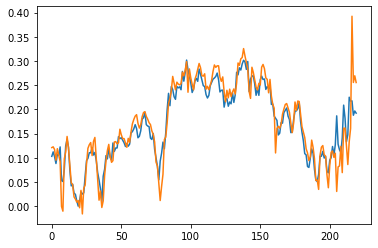

In [19]:
plt.plot(y_test)
plt.plot(predictions)
plt.show()